Introduction to the ContentMine toolkit
================================

I'm trying find theses and articles that refer to Coronavirus etc by running ami-search over them with the openVirus dictionaries. I have fulltext.pdf files, but I believe I need scholarly.html files to run ami-search (it says it can't find any text).

Thanks - these are wonderful questions. No need to apologize.
AMI has been built in an ad hoc fashion from a variety of projects and
often not finished. So I tested that GROBI worked but at that stage no one
was interested in using it. I'll hack ami-Grobid to output scholarly.html.
Hoping that everything will move to using something similar to JATS (which
has a subset of HTML)


 Thanks, that's very helpful! I get meaningful results after doing a cp
 tei/fulltext.tei.html scholarly.html.

 I'm happy trying things out and handling conversions.
Great. A lot of this is in the system but not well documented one place to
start is my slides
https://www.slideshare.net/petermurrayrust/text-and-data-mining-explained-at-ftdm
and a lot of other similar ones
 The bit I'm struggling with is the overall workflow stages and any
 constraints on how the data is suppose to be. Example questions:

    - The OCR/Grobid workflows appear to target the generation of
    scholarly.html but the current AMI3 project requires me to pick one
    workflow and copy the result into place as scholarly.html, right?

I will try to hack grobid tonight.

    - Am I right to think that ami-search works happily with plain text
    fulltext.pdf.txt or HTML scholarly.html, but nothing else?

 I think so

    - Will any reasonable plain text or HTML representation suffice? (e.g
    at first I thought scholarly.html was referring to this proposal
    <https://w3c.github.io/scholarly-html/> but I think not?)

 Any Html will work as long as its well-formed - I think. Scholarly HTML
hasn't really taken off and I think the HTML subset in JATS will work.

    - It seems ami-search generates plain XML - how does this relate to
    generating WikiData content?

 AMI search uses Wikidata. It doesn't currently generate Wikidata.

    - I think ami-search takes keywords relating to specific concepts
    (dictionaries) and records where they appear in a set of texts, right?

 Yes, absolutely.



ami-makeproject -p ethos --rawfiletypes pdf

In [4]:
%%bash
find ethos -type f

ethos/uk.bl.ethos.755301/word.frequencies.count.xml
ethos/uk.bl.ethos.755301/scholarly.pdf
ethos/uk.bl.ethos.755301/search.country.count.xml
ethos/uk.bl.ethos.755301/scholarly.html
ethos/uk.bl.ethos.755301/results/word/frequencies/results.html
ethos/uk.bl.ethos.755301/results/word/frequencies/results.xml
ethos/uk.bl.ethos.755301/results/search/country/results.xml
ethos/uk.bl.ethos.755301/word.frequencies.snippets.xml
ethos/uk.bl.ethos.755301/fulltext.pdf
ethos/uk.bl.ethos.755301/search.country.snippets.xml
ethos/word.frequencies.count.xml
ethos/word.frequencies.documents.xml
ethos/search.country.documents.xml
ethos/full.dataTables.html
ethos/search.country.count.xml
ethos/word.frequencies.snippets.xml
ethos/search.country.snippets.xml
ethos/__cooccurrence/country/histogram.svg
ethos/__cooccurrence/country/histogram.csv
ethos/__cooccurrence/country-country/cooccur.svg
ethos/__cooccurrence/country-country/cooccur.csv
ethos/__cooccurrence/allPlots.svg
ethos/commonest.dataTables.html
ethos

From PDF to HTML
----------------------------

### Via OCR

In [8]:
%%bash
ami-pdf -p ethos

Usage: ami-pdf [OPTIONS]
Description
Convert PDFs to SVG-Text, SVG-graphics and Images. Does not process images,
graphics or text.often followed by ami-image and ami-xml?
Options
      --debug               debug level (experimental, AMI_ZERO, AMI_ONE,
                              AMI_TWO)
                              Default: AMI_BRIEF
      --dryrun=<dryrun>     (A) for testing runs a single phase without output,
                              deletion or transformation.(NYI).
      --excludebase=<excludeBase>...
                            (A) exclude child files of cTree (only works with
                              --ctree). Currently must be explicit or with
                              trailing percent for truncated glob.
      --excludetree=<excludeTrees>...
                            (A) exclude the CTrees in the list. (only works
                              with --cproject). Currently must be explicit but
                              we'll add globbing later.
      --f

In [17]:
%%bash
ami-ocr -p ethos --tesseract /usr/bin/tesseract --extractlines hocr


Generic values (AMIOCRTool)
-v to see generic values
oldstyle            true

Specific values (AMIOCRTool)
disambiguate        false
extractlines        [hocr]
glyphs              false
gocr                null
html                true
maxsize             null
mergeNames          []
replace             []
scale               null
scalefactor         null
scaledFilename      null
tesseractPath       /usr/bin/tesseract

AMIOCRTool cTree: uk.bl.ethos.755301
 >>>>> imageDirs: 17
>image.181.1.101_438/raw>
>skip hocr>
>image.182.1.101_299/raw>
>skip hocr>
>image.182.2.303_433/raw>
>skip hocr>
>image.182.3.444_545/raw>
>skip hocr>
>image.182.4.113_229/raw>
>skip hocr>
>image.182.5.277_408/raw>
>skip hocr>
>image.182.6.457_535/raw>
>skip hocr>
>image.183.1.101_507/raw>
>skip hocr>
>image.25.1.101_544/raw>
>skip hocr>
0    [main] DEBUG org.contentmine.eucl.euclid.IntegerMultiset  - splitAtGaps NYI fully): [133]
0 [main] DEBUG org.contentmine.eucl.euclid.IntegerMultiset  - splitAtGaps NYI full

In [16]:
%%bash
ami-ocr --help

Usage: ami-ocr [OPTIONS]
Description
Extracts text from OCR and (NYI) postprocesses HOCR output to create HTML.
Options
      --disambiguate[=<disambiguate>]
                            try to diambiguate characters
      --dryrun=<dryrun>     (A) for testing runs a single phase without output,
                              deletion or transformation.(NYI).
      --excludebase=<excludeBase>...
                            (A) exclude child files of cTree (only works with
                              --ctree). Currently must be explicit or with
                              trailing percent for truncated glob.
      --excludetree=<excludeTrees>...
                            (A) exclude the CTrees in the list. (only works
                              with --cproject). Currently must be explicit but
                              we'll add globbing later.
      --extractlines=<extractLines>...
                            extracts textlines from gocr and/or hocr
                          

no trees


In [34]:
%%bash
find ethos -type f

ethos/uk.bl.ethos.755301/pdfimages/image.36.1.101_453.189_434.png
ethos/uk.bl.ethos.755301/pdfimages/image.182.1.101_299.132_246.png
ethos/uk.bl.ethos.755301/pdfimages/image.65.1.101_423.32_276.png
ethos/uk.bl.ethos.755301/pdfimages/image.182.5.277_408.62_91.png
ethos/uk.bl.ethos.755301/pdfimages/image.181.1.101_438.67_608.png
ethos/uk.bl.ethos.755301/pdfimages/image.48.1.101_438.409_654.png
ethos/uk.bl.ethos.755301/pdfimages/image.35.1.101_439.32_273.png
ethos/uk.bl.ethos.755301/pdfimages/image.182.4.113_229.62_91.png
ethos/uk.bl.ethos.755301/pdfimages/image.78.1.101_490.168_377.png
ethos/uk.bl.ethos.755301/pdfimages/image.56.1.101_497.522_662.png
ethos/uk.bl.ethos.755301/pdfimages/image.182.3.444_545.116_246.png
ethos/uk.bl.ethos.755301/pdfimages/image.66.1.101_502.59_218.png
ethos/uk.bl.ethos.755301/pdfimages/image.25.1.101_544.32_497.png
ethos/uk.bl.ethos.755301/pdfimages/image.182.2.303_433.108_246.png
ethos/uk.bl.ethos.755301/pdfimages/image.183.1.101_507.32_330.png
ethos/uk.bl.e

ethos/uk.bl.ethos.755301/svg/fulltext-page.51.svg
ethos/uk.bl.ethos.755301/svg/fulltext-page.198.svg
ethos/uk.bl.ethos.755301/svg/fulltext-page.0.svg
ethos/uk.bl.ethos.755301/svg/fulltext-page.156.svg
ethos/uk.bl.ethos.755301/svg/fulltext-page.246.svg
ethos/uk.bl.ethos.755301/svg/fulltext-page.232.svg
ethos/uk.bl.ethos.755301/svg/fulltext-page.166.svg
ethos/uk.bl.ethos.755301/svg/fulltext-page.244.svg
ethos/uk.bl.ethos.755301/svg/fulltext-page.221.svg
ethos/uk.bl.ethos.755301/svg/fulltext-page.62.svg
ethos/uk.bl.ethos.755301/svg/fulltext-page.134.svg
ethos/uk.bl.ethos.755301/svg/fulltext-page.177.svg
ethos/uk.bl.ethos.755301/svg/fulltext-page.144.svg
ethos/uk.bl.ethos.755301/svg/fulltext-page.10.svg
ethos/uk.bl.ethos.755301/svg/fulltext-page.200.svg
ethos/uk.bl.ethos.755301/svg/fulltext-page.162.svg
ethos/uk.bl.ethos.755301/svg/fulltext-page.152.svg
ethos/uk.bl.ethos.755301/svg/fulltext-page.136.svg
ethos/uk.bl.ethos.755301/svg/fulltext-page.155.svg
ethos/uk.bl.ethos.755301/svg/fulltex

In [36]:
curl -x explorer.bl.uk:3127 -O https://www.mirrorservice.org/sites/ftp.apache.org/tika/tika-app-1.24.jar

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 71.9M  100 71.9M    0     0  40.5M      0  0:00:01  0:00:01 --:--:-- 40.5M


In [ ]:
%%bash
java -jar ./tika-app-1.24.jar ethos/uk.bl.ethos.755301/fulltext.pdf > ethos/uk.bl.ethos.755301/scholarly.html

In [19]:
%%bash
ami-search -p ethos --dictionary=virus_topics --dictionaryTop=$PWD


Generic values (AMISearchTool)
-v to see generic values
oldstyle            true

Specific values (AMISearchTool)
oldstyle             true
strip numbers        false
wordCountRange       (20,1000000)
wordLengthRange      (1,20)

dictionaryList       [virus_topics]
dictionaryTop        [/home/anj]
dictionarySuffix     [xml]

0    [main] DEBUG org.contentmine.ami.tools.AbstractAMISearchTool  - old style search command); change
0 [main] DEBUG org.contentmine.ami.tools.AbstractAMISearchTool  - old style search command); change
cProject: ethos
legacy cmd> word(frequencies)xpath:@count>20~w.stopwords:pmcstop.txt_stopwords.txt
legacy cmd> search(virus_topics)

large document (7031) for uk.bl.ethos.755301 truncated to 500 sections
...
create data tables
rrrr

uk.bl.ethos.755301 cannot run command: search([virus_topics])[]; cannot process argument: --sr.search (RuntimeException: cannot read inputStream for dictionary: /org/contentmine/ami/plugins/dictionary/virus_topics.xml)


In [ ]:
%%bash
find ethos

In [22]:
%%bash
cp dictionaries/*.xml /org/contentmine/ami/plugins/dictionary

cp: target '/org/contentmine/ami/plugins/dictionary' is not a directory


CalledProcessError: Command 'b'cp dictionaries/*.xml /org/contentmine/ami/plugins/dictionary\n'' returned non-zero exit status 1.

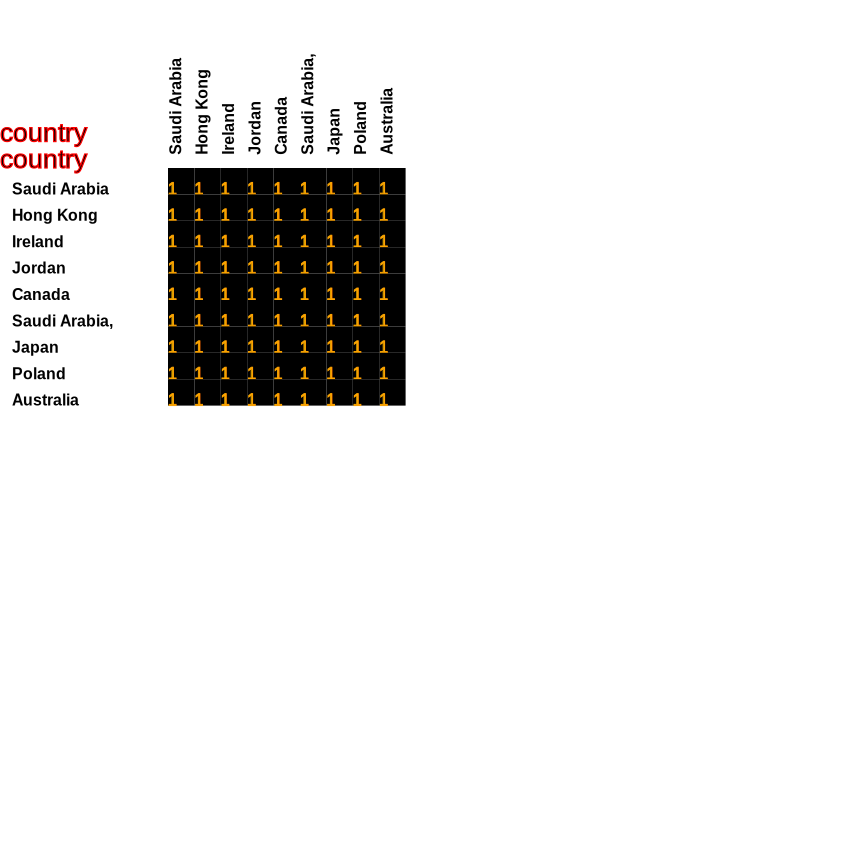

In [3]:
from IPython.display import SVG,display
display(SVG(filename='ethos/__cooccurrence/allPlots.svg'))